In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
import numpy as np

# Load the Excel file
df = pd.read_excel('/home/lithium/Network-Science-Project/CS Course Enrollment Data 030824.xlsx')

# Get all the semester columns.
semester_classs = df.columns[3:-2]
df

ADMIT_ACADEMIC_PERIOD_DESC          PRIMARY_1ST_MAJOR_DESC  \
0                     Fall 2018                Computer Science   
1                   Spring 2018  Operations Research w/Enginrng   
2                     Fall 2018                Computer Science   
3                   Spring 2024                  STEM Education   
4                   Summer 2021                Computer Science   
...                         ...                             ...   
7344                  Fall 2023                Computer Science   
7345                  Fall 2023                Computer Science   
7346                Spring 2024                Computer Science   
7347                Spring 2024          Mechanical Engineering   
7348                Spring 2024                Computer Science   

     PRIMARY_1ST_DEPARTMENT_DESC CSCI101_Pass_Sem CSCI101_Tran_Sem  \
0               Computer Science              NaN              NaN   
1         Economics and Business              NaN              NaN   
2               Computer Science        Fall 2018              NaN   
3                         Honors              NaN              NaN   
4               Computer Science              NaN              NaN   
...                          ...              ...              ...   
7344            Computer Science              NaN              NaN   
7345            Computer Science              NaN              NaN   
7346            Computer Science              NaN              NaN   
7347      Mechanical Engineering              NaN              NaN   
7348            Computer Science              NaN              NaN   

     CSCI128_Pass_Sem CSCI128_Tran_Sem CSCI200_Pass_C_Sem CSCI200_Tran_Sem  \
0                 NaN              NaN                NaN              NaN   
1                 NaN              NaN                NaN              NaN   
2                 NaN              NaN                NaN              NaN   
3                 NaN              NaN                NaN              NaN   
4                 NaN              NaN                NaN              NaN   
...               ...              ...                ...              ...   
7344        Fall 2023              NaN                NaN              NaN   
7345        Fall 2023              NaN                NaN              NaN   
7346              NaN      Spring 2024                NaN      Spring 2024   
7347              NaN      Spring 2024                NaN              NaN   
7348              NaN      Spring 2024                NaN      Spring 2024   

      CSCI210_Pass_Sem  ... CSCI448_Pass_Sem CSCI455_Pass_Sem  \
0                  NaN  ...              NaN              NaN   
1                  NaN  ...              NaN              NaN   
2                  NaN  ...              NaN              NaN   
3                  NaN  ...              NaN              NaN   
4                  NaN  ...              NaN              NaN   
...                ...  ...              ...              ...   
7344               NaN  ...              NaN              NaN   
7345               NaN  ...              NaN              NaN   
7346               NaN  ...              NaN              NaN   
7347               NaN  ...              NaN              NaN   
7348               NaN  ...              NaN              NaN   

     CSCI470_Pass_Sem CSCI471_Pass_Sem CSCI473_Pass_Sem CSCI474_Pass_Sem  \
0                 NaN              NaN              NaN              NaN   
1                 NaN              NaN              NaN              NaN   
2           Fall 2019        Fall 2019              NaN              NaN   
3                 NaN              NaN              NaN              NaN   
4                 NaN              NaN              NaN              NaN   
...               ...              ...              ...              ...   
7344              NaN              NaN              NaN              NaN   
7345              NaN            

In [2]:
#Assume that the dataframe is only the pass/ransfer dates.
pass_df = df.drop(columns=[df.columns[0],df.columns[1],df.columns[2],df.columns[-1]])

pass_df.head()

CSCI101_Pass_Sem CSCI101_Tran_Sem CSCI128_Pass_Sem CSCI128_Tran_Sem  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2        Fall 2018              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

  CSCI200_Pass_C_Sem CSCI200_Tran_Sem  CSCI210_Pass_Sem CSCI220_Pass_Sem  \
0                NaN              NaN               NaN              NaN   
1                NaN              NaN               NaN              NaN   
2                NaN              NaN               NaN              NaN   
3                NaN              NaN               NaN              NaN   
4                NaN              NaN               NaN              NaN   

  CSCI220_Tran_Sem CSCI261_Pass_C_Sem  ... CSCI446_Pass_Sem CSCI448_Pass_Sem  \
0              NaN                NaN  ...              NaN              NaN   
1              NaN                NaN  ...              NaN              NaN   
2              NaN                NaN  ...              NaN              NaN   
3              NaN                NaN  ...              NaN              NaN   
4              NaN                NaN  ...              NaN              NaN   

  CSCI455_Pass_Sem CSCI470_Pass_Sem CSCI471_Pass_Sem CSCI473_Pass_Sem  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   
2              NaN        Fall 2019        Fall 2019              NaN   
3              NaN              NaN              NaN              NaN   
4              NaN              NaN              NaN              NaN   

  CSCI474_Pass_Sem CSCI475_Pass_Sem CSCI477_Pass_Sem CSCI478_Pass_Sem  
0              NaN        Fall 2019              NaN              NaN  
1              NaN              NaN              NaN              NaN  
2              NaN              NaN              NaN              NaN  
3              NaN              NaN              NaN              NaN  
4              NaN              NaN              NaN              NaN  

[5 rows x 62 columns]

In [3]:
#sudo apt install graphviz-dev on ubuntu
#%pip install pygraphviz 

Index([  14,   27,   32,   40,   51,   78,  104,  131,  136,  140,
       ...
       6484, 6485, 6486, 6487, 6489, 6491, 6494, 6498, 6500, 6501],
      dtype='int64', length=3020)


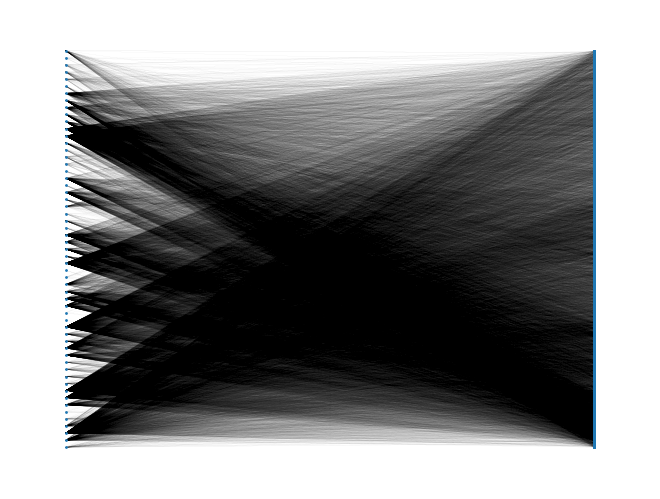

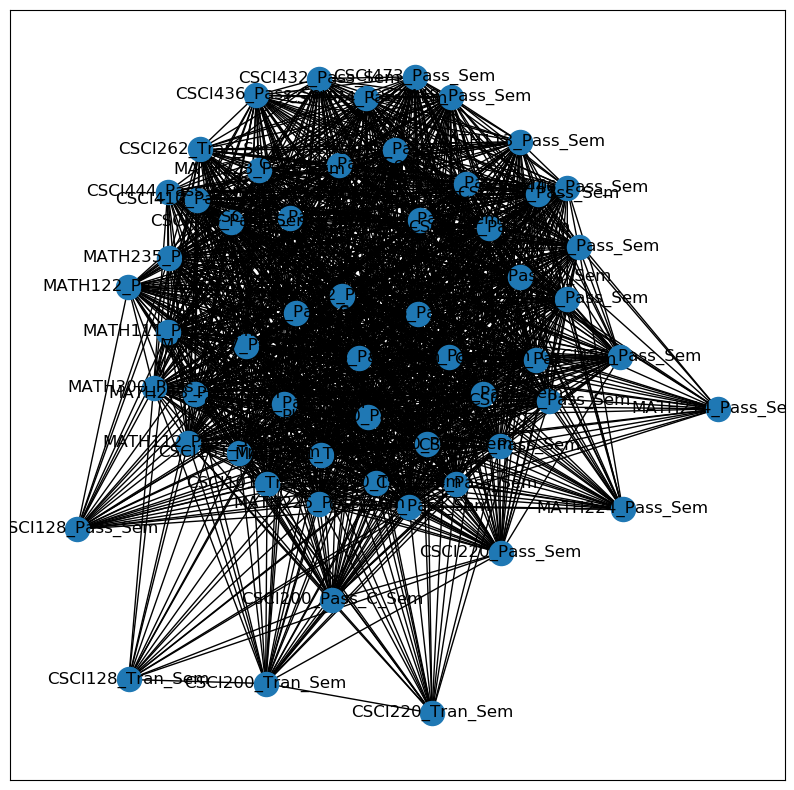

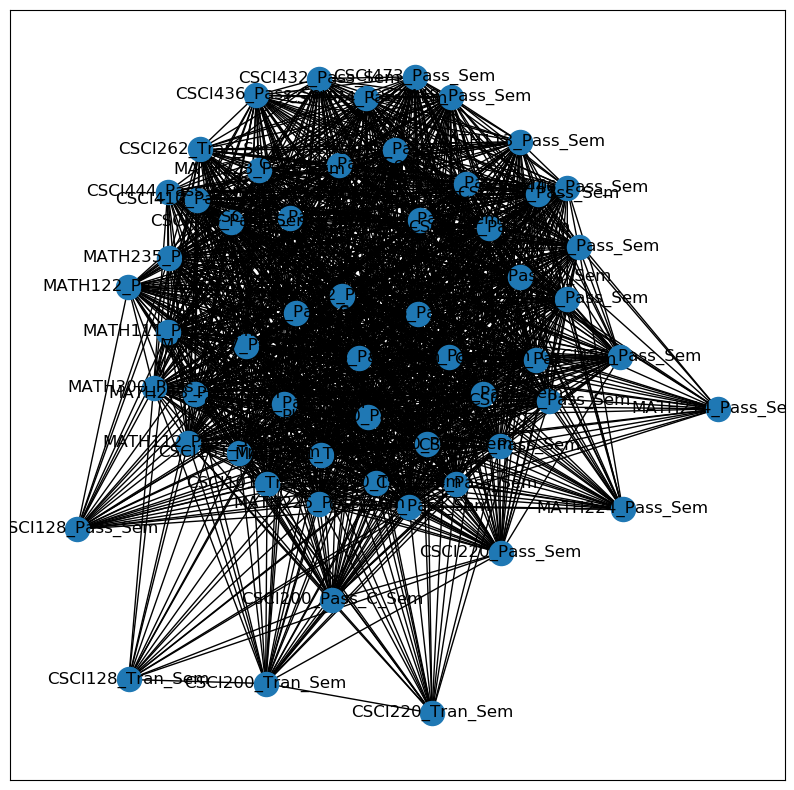

In [17]:
import matplotlib.pyplot as plt

#Draw a weighted projection
def draw_projection(Proj):
    pos = nx.nx_agraph.graphviz_layout(Proj, prog="neato", root="CSCI406_Pass_Sem")
    plt.figure(figsize=(10, 10))

    degrees = Proj.degree()
    node_sizes = [degrees[node] * 10 for node in Proj.nodes()]

    max_weight = max(nx.get_edge_attributes(Proj, 'weight'))
    # for weight in nx.get_edge_attributes(Proj, 'weight'):
    nx.draw_networkx_edges(Proj, pos)

    nx.draw_networkx_nodes(Proj, pos)
    nx.draw_networkx_labels(Proj,pos)

    # nx.draw_networkx_edge_labels(Proj, pos, edge_labels=edge_labels)
    plt.show()


#Obtain the projection and bipartite graph for a semester
def bipartite_and_projection(pass_df, semester = 'Fall 2019', all_semesters = False):
    filtered_df = pass_df[pass_df.apply(lambda row: semester in row.values, axis=1)]
    
    if all_semesters:
        filtered_df = pass_df

    #Drop useless columns
    cols_to_drop = [col for col in filtered_df.columns if len(filtered_df[col].unique()) == 1]
    filtered_df = filtered_df.drop(cols_to_drop, axis=1)

    #Projecting the graph to see any conflicts.
    U = list(filtered_df.columns) # Classes 
    V = filtered_df.index.values # Students
    print(filtered_df.index)
    G = nx.Graph()

    #Construct the bipartite graph
    for student_id, student in filtered_df.iterrows():
        for class_id, semester_taken in enumerate(student):        
            if not pd.isna(semester_taken):
                G.add_edge(student_id,filtered_df.columns[class_id])

    assert(nx.bipartite.is_bipartite(G) == True)

    #Construct the projection.
    Proj = nx.bipartite.weighted_projected_graph(G, U)

    return G, Proj, U

def remove_edges_below_weight_thresh(graph, weight_threshold):
    edges_to_remove = [(u, v) for u, v, w in graph.edges(data=True) if w.get('weight', 1) < weight_threshold]
    graph.remove_edges_from(edges_to_remove)


G, Proj, U = bipartite_and_projection(pass_df, semester="Fall 2022")
# fig = plt.figure(1, figsize=(200, 80), dpi=60)
# remove_edges_below_weight_thresh(Proj,10)

nx.draw(G, pos=nx.bipartite_layout(G, U),  node_size=1, width=0.01)

draw_projection(Proj)

16


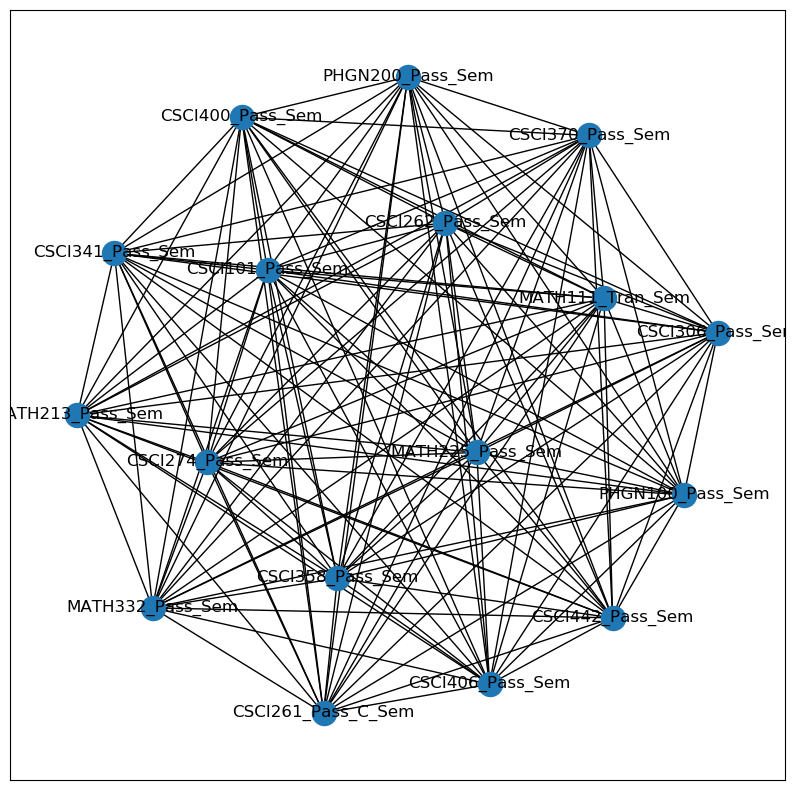

In [37]:
remove_edges_below_weight_thresh(Proj,300)
core_numbers = nx.core_number(Proj)
max_core_number = max(core_numbers.values())
print(max_core_number)

core = nx.k_core(Proj, max_core_number)
draw_projection(core)

In [ ]:
G, Proj = bipartite_and_projection(pass_df, semester="Fall 2024")

Index([], dtype='int64')


KeyError: 'CSCI101_Pass_Sem'

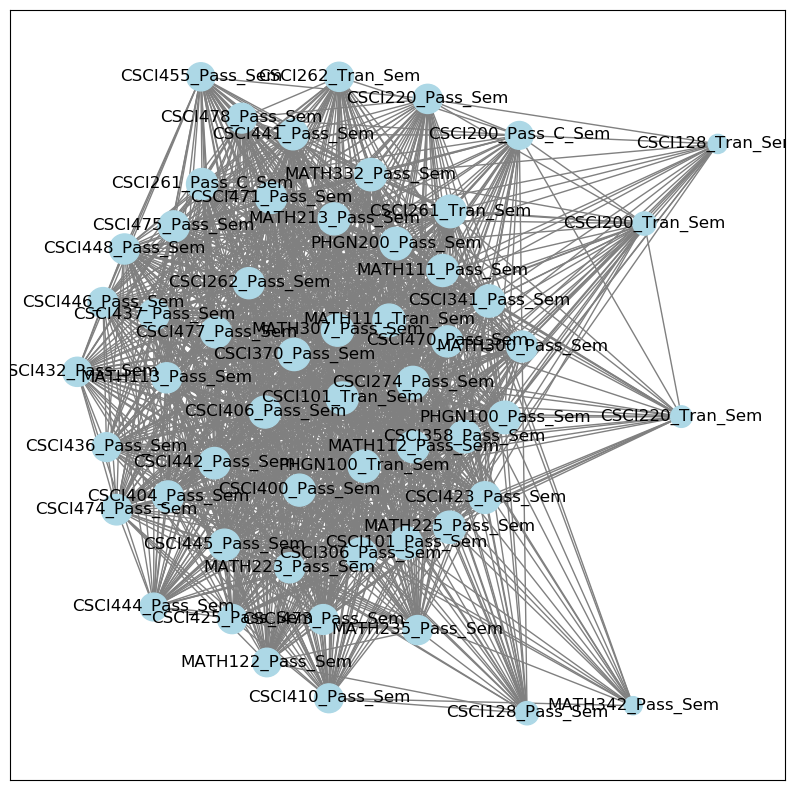

In [ ]:
draw_projection(Proj)

# Across All Semesters.

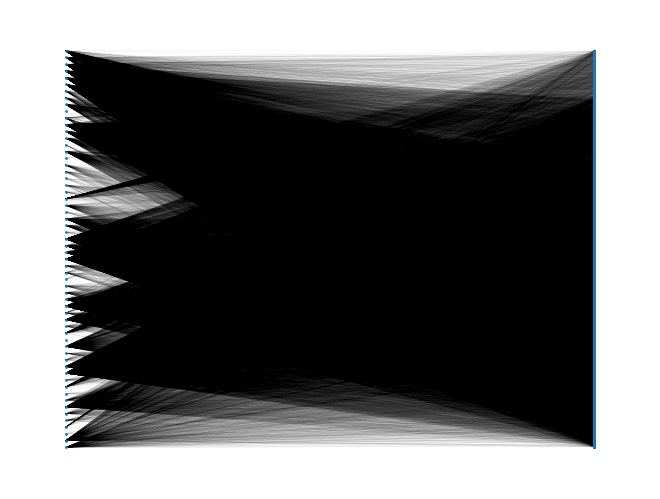

In [ ]:
G, Proj = bipartite_and_projection(pass_df, all_semesters=True)

nx.draw(G, pos=nx.bipartite_layout(G, U),  node_size=1, width=0.01)

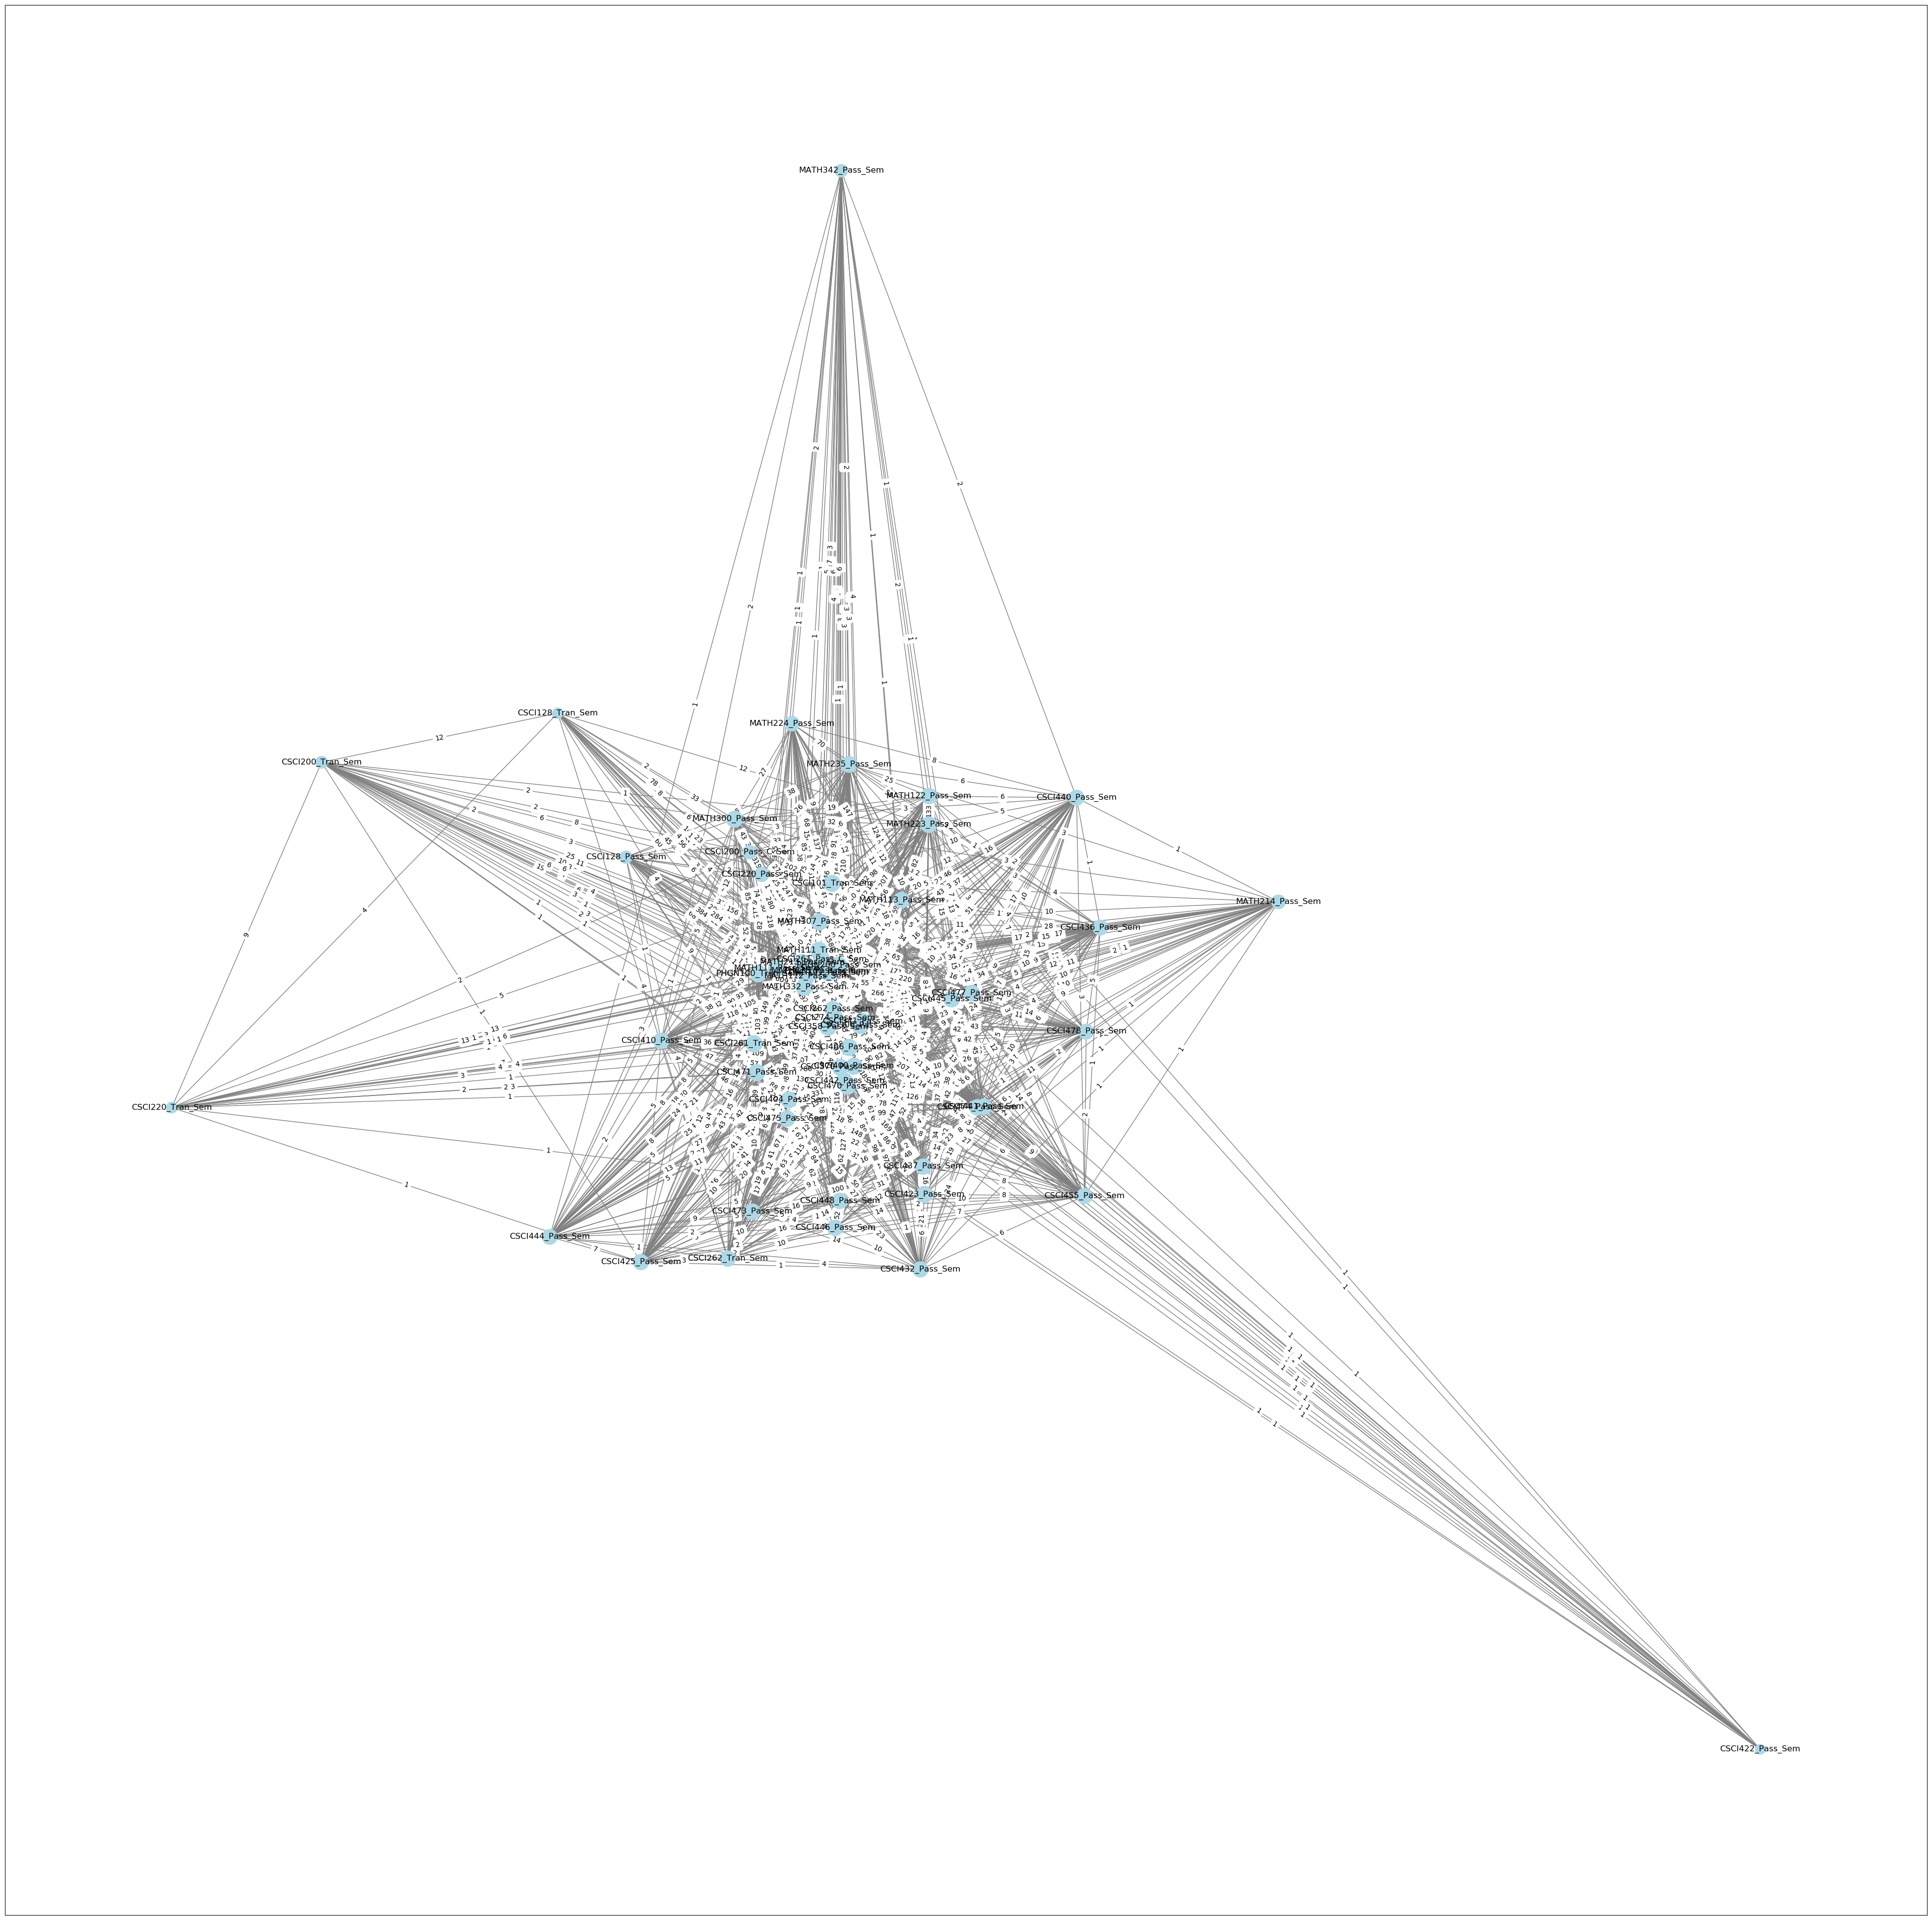

In [ ]:
draw_projection(Proj)